# Import dataset from sklearn

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
#list of attributes
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Dataset Understand and Clean

In [6]:
# Data points and features
type(boston_dataset.data)

numpy.ndarray

In [7]:
boston_dataset.data.shape  # shape of data
# we have 506 datapoints and each data point have 13 features. rows are datapoints
# columns in a row are features of that data.

(506, 13)

In [8]:
print(boston_dataset.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [9]:
boston_dataset.filename

'D:\\anaconda\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [10]:
#this is actual data that we use for training and testing. compare with predicted values
print(boston_dataset.target)
print(boston_dataset.target.size)
#data in x1000

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [11]:
print(boston_dataset.feature_names)
print(type(boston_dataset.feature_names))
boston_dataset.target.shape

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
<class 'numpy.ndarray'>


(506,)

# Data exploration with Pandas dataframes

In [12]:
#create pandas dataframe
data = pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)

#add column to dataframe
data['PRICE'] = boston_dataset.target

In [13]:
data.head()  #give first few rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
data.tail()  #give last rows 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [15]:
data.count()  # show number of rows for each column

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data- check for missing values

In [16]:
pd.isnull(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#

# Visualising Data - Histrograms, Distributions and Bar Charts

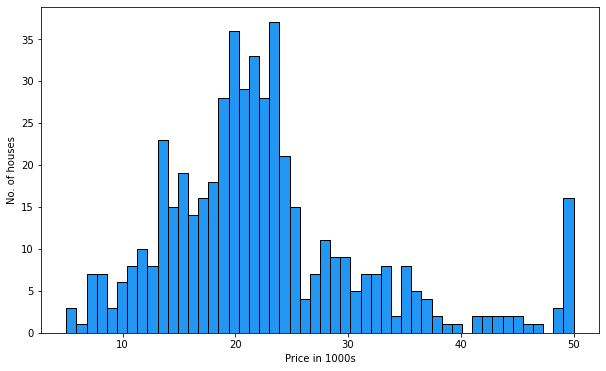

In [19]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=50, ec='black',color='#2196f3')
plt.xlabel('Price in 1000s')
plt.ylabel('No. of houses')
plt.show()

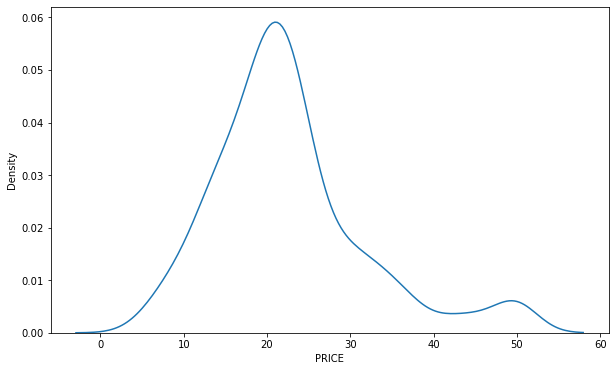

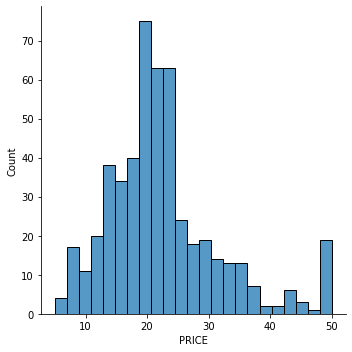

In [20]:
plt.figure(figsize=(10,6))
sns.kdeplot(data['PRICE'])
sns.displot(data['PRICE'])

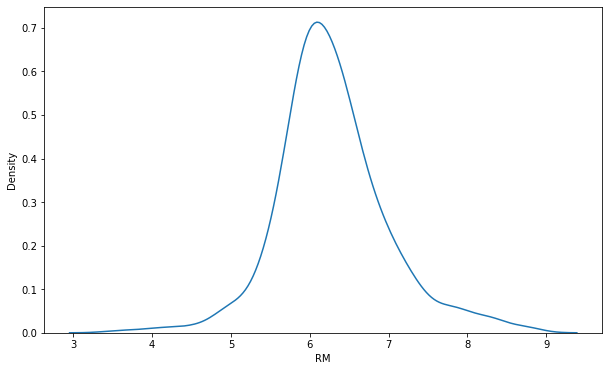

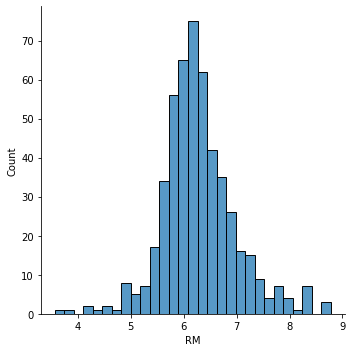

In [21]:
plt.figure(figsize=(10,6))
sns.kdeplot(data['RM'])
sns.displot(data['RM'])

In [22]:
#avarage number of rooms in house
data['RM'].mean()

6.284634387351787

<Figure size 720x432 with 0 Axes>

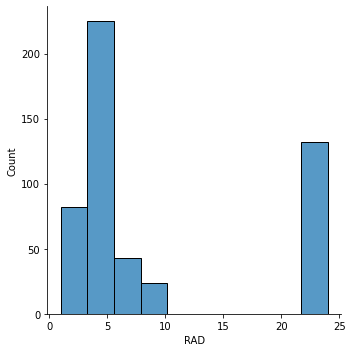

In [23]:
#RAD - accessibility
plt.figure(figsize=(10,6))
sns.displot(data['RAD'])

In [24]:
data['RAD'].value_counts()  # give number of distinct values

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

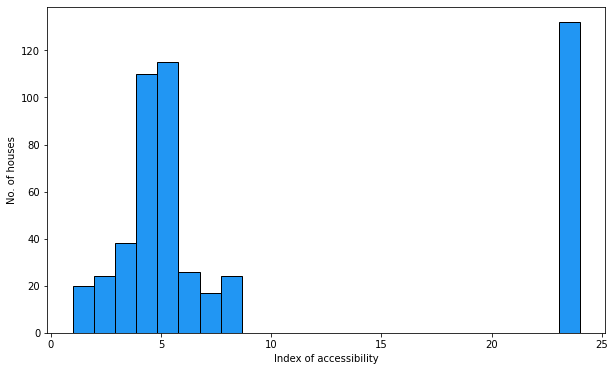

In [25]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], bins=24, ec='black',color='#2196f3')
plt.xlabel('Index of accessibility')
plt.ylabel('No. of houses')
plt.show()

In [26]:
freq = data['RAD'].value_counts()
type(freq)  #this is series
print(freq.index)
print(freq.values)
print(freq)

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')
[132 115 110  38  26  24  24  20  17]
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64


<BarContainer object of 9 artists>

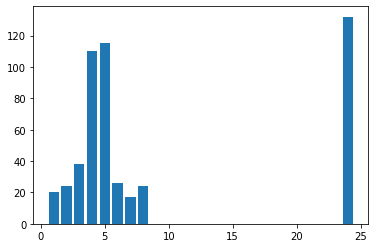

In [27]:
plt.bar(freq.index, height=freq.values)  #no need specify bar charts

In [28]:
data['CHAS'].value_counts() 

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

### mean -> Avarage (add all prices of houses and divide bu number of houses)
### median-> sort lowest to highest, take middle house price

In [29]:
data['PRICE'].min()

5.0

In [30]:
data['PRICE'].max()

50.0

In [31]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [32]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [33]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [34]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [35]:
data.describe()  #median = 50%

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Correlation
## between -1 to 1

In [36]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [37]:
data['RM'].corr(data['PRICE'])

0.695359947071539

In [38]:
data['PRICE'].corr(data['PRICE'])

1.0

In [39]:
data.corr()   # Pearson correlation. can change via params 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [40]:
mask = np.zeros_like(data.corr())
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [41]:
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

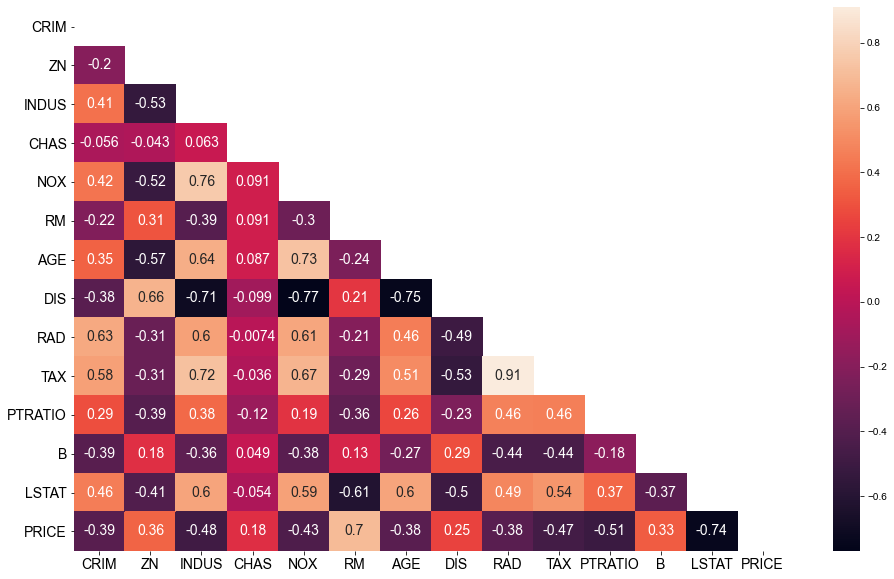

In [42]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask,annot=True, annot_kws={"size":14})
sns.set_style('white')
sns.set_theme('talk')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

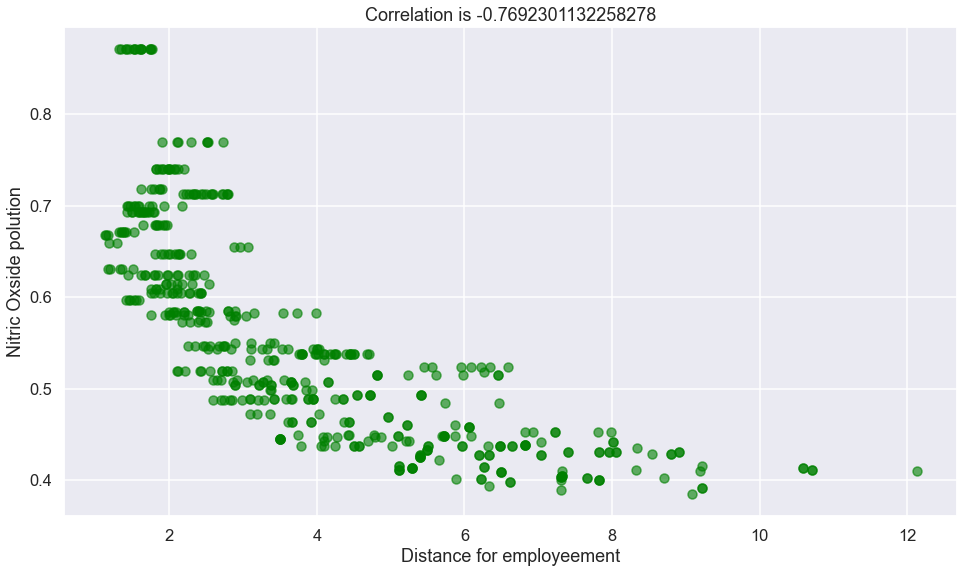

In [43]:
nox_dis_corr = data['NOX'].corr(data['DIS'])
plt.figure(figsize=(16,9))
plt.scatter(x=data['DIS'],y=data['NOX'],alpha=0.6,color='green')
plt.title(f'Correlation is {nox_dis_corr}')
plt.xlabel('Distance for employeement')
plt.ylabel('Nitric Oxside polution')
plt.show()

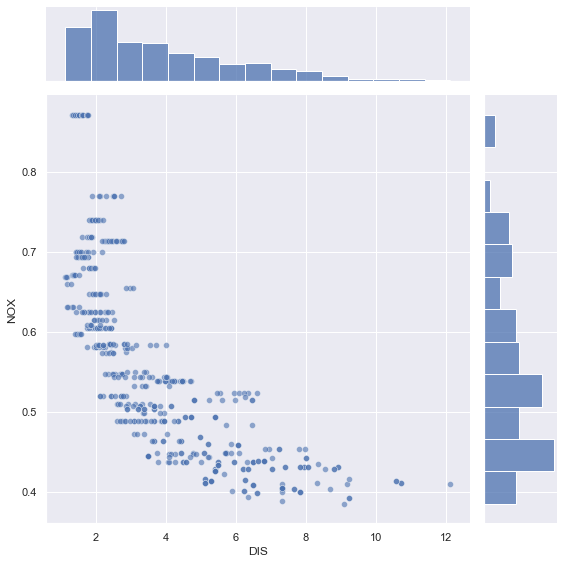

In [44]:
sns.set()  #reset prev styles
sns.set_style('darkgrid')
sns.jointplot(x=data['DIS'],y=data['NOX'],alpha=0.6,height=8)

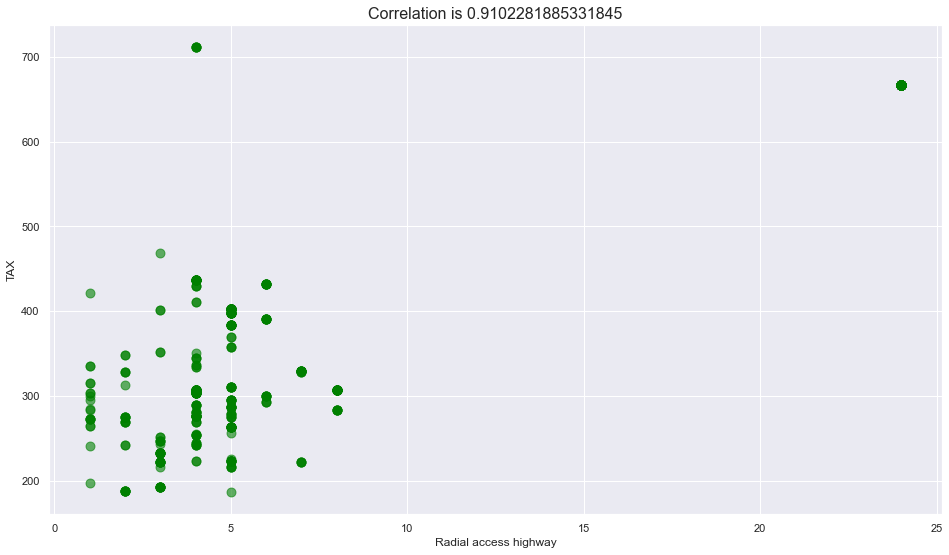

In [45]:
nox_dis_corr = data['RAD'].corr(data['TAX'])
plt.figure(figsize=(16,9))
plt.scatter(x=data['RAD'],y=data['TAX'],alpha=0.6,color='green',s=80)
plt.title(f'Correlation is {nox_dis_corr}',fontsize=16)
plt.xlabel('Radial access highway')
plt.ylabel('TAX')
plt.show()

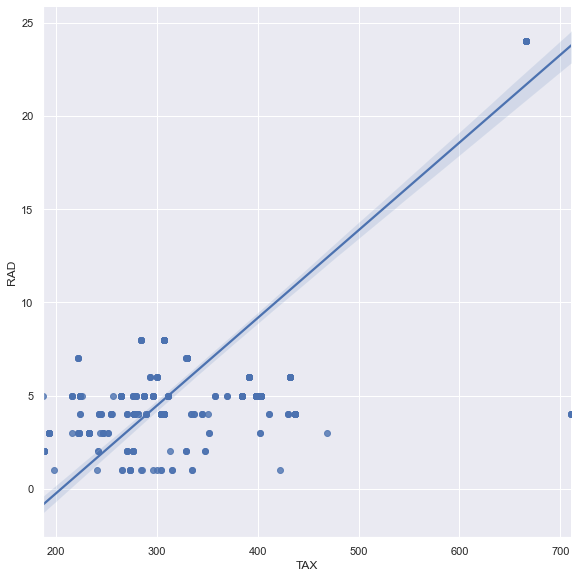

In [46]:
sns.lmplot(x='TAX',y='RAD',data=data,height=8)
plt.show()

In [47]:
# plot all pairs
#sns.pairplot(data)
#plt.show()

In [48]:
#sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'red'}})#
#plt.show()

## Create training and testing data 

In [49]:
prices = data['PRICE']
features = data.drop('PRICE',axis=1)

X_train,X_test, y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

# X_train - has 80% rows of feature set. can check size using len, since it uses list of lists.
# random_state is optional


In [50]:
X_test  # random 102 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
305,0.05479,33.0,2.18,0.0,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93
193,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66
174,0.08447,0.0,4.05,0.0,0.510,5.859,68.7,2.7019,5.0,296.0,16.6,393.23,9.64
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27
242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22


# Multivariable regression

In [51]:
# process linear regression
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [52]:
# Make prediction of theta values of linear regression funcion 
# using corr data and prev charts
'''
price_hat = 01 + 02RM + 03NOX + ........ + 013LSTAT

can we predict values fot thetas before linear regression??????????

Price & RM corr = positive
price $ NOX corr = negative

'''

'\nprice_hat = 01 + 02RM + 03NOX + ........ + 013LSTAT\n\ncan we predict values fot thetas before linear regression??????????\n\nPrice & RM corr = positive\nprice $ NOX corr = negative\n\n'

In [53]:
print('Intercept',regr.intercept_)
pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['coef'])

Intercept 36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [54]:
## price_hat = 36.6 + 3.1RM - 16.3NOX -  1.5DIS + 2.0CHAS + ... -0.6 LSTAT

## see score, accuracy
print('Training data r-squared: ', regr.score(X_train,y_train))
print('Testing data r-squared: ', regr.score(X_test,y_test))

Training data r-squared:  0.750121534530608
Testing data r-squared:  0.6709339839115628


 ## Evaluate model , Improve model accuray, Deploy
 
 ### evaluation criterias : R-squared, p-values, V.I.F, BIC
 

## Data Transformation

In [55]:
#check skew of data , normal distribution => skew=0, skew not good, here skew=1.1
data['PRICE'].skew()

#reduce skew, can use data transformation -> multiplying,dividing, Log


1.1080984082549072

In [56]:
y_log = np.log(data['PRICE'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [57]:
y_log.skew()  # -0.33 closer to zero, better than prev y values

-0.33032129530987864

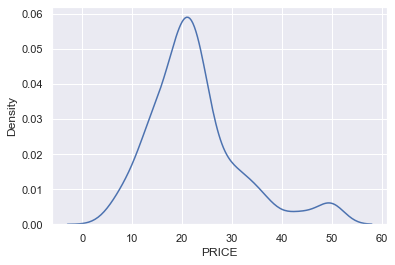

In [58]:
sns.kdeplot(data['PRICE'])
plt.show()

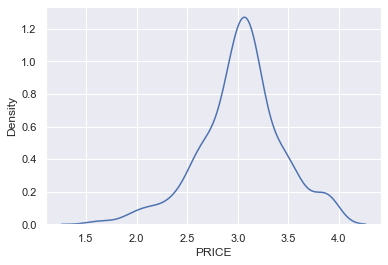

In [59]:
sns.kdeplot(y_log)
plt.show()
# reduce skew

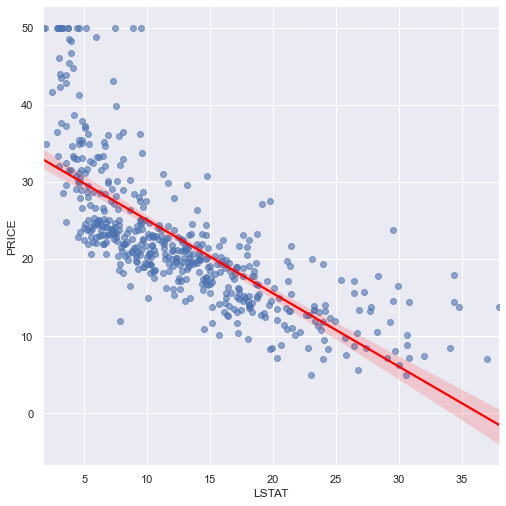

In [60]:
# test skew
sns.lmplot(x='LSTAT',y='PRICE', data=data, height=7,
          scatter_kws={'alpha':0.6},line_kws={'color':'red'})
plt.show()

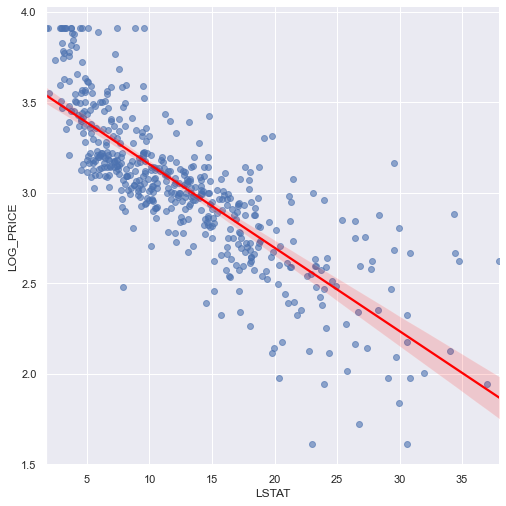

In [61]:
trns_data = features
trns_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT',y='LOG_PRICE', data=trns_data, height=7,
          scatter_kws={'alpha':0.6},line_kws={'color':'red'})
plt.show()

## Linear regression of transformed data

In [62]:
## log(price_hat) = 0o + 01RM + 02NOX + .... + 013LSTAT
## after transformation, we can find above thetas for log(values)

prices = np.log(data['PRICE'])
features = data.drop('PRICE',axis=1)

X_train,X_test, y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

regr = LinearRegression()
regr.fit(X_train,y_train)

print('Intercept',regr.intercept_)
print(pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['coef']))

print('Training data r-squared: ', regr.score(X_train,y_train))
print('Testing data r-squared: ', regr.score(X_test,y_test))


Intercept 4.05994387177519
             coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390
Training data r-squared:  0.7930234826697583
Testing data r-squared:  0.7446922306260724


# P values and Evaluating coeffients

In [63]:
x_value_const = sm.add_constant(X_train)   #same as X_train + extra column
model = sm.OLS(y_train,x_value_const)
results = model.fit()

result_dataframe = pd.DataFrame({'coef': results.params,'p-values':round(results.pvalues,3)})
print(result_dataframe)

#results shows that INDUS and AGE are insignificant 

             coef  p-values
const    4.059944     0.000
CRIM    -0.010672     0.000
ZN       0.001579     0.009
INDUS    0.002030     0.445
CHAS     0.080331     0.038
NOX     -0.704068     0.000
RM       0.073404     0.000
AGE      0.000763     0.209
DIS     -0.047633     0.000
RAD      0.014565     0.000
TAX     -0.000645     0.000
PTRATIO -0.034795     0.000
B        0.000516     0.000
LSTAT   -0.031390     0.000


In [64]:
print(type(results))
print(results)

<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>


# Testing for Multicollinearity

## using VIF

In [65]:
#variance_inflation_factor
print(round(x_value_const,4))
print(round(X_train,4))
print(x_value_const.columns)
print(type(x_value_const))       # type=DataFrame
print(type(x_value_const.values))   #type=ndarray

     const     CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD  \
50     1.0   0.0887  21.0   5.64   0.0  0.439  5.963   45.7  6.8147   4.0   
367    1.0  13.5222   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0   
34     1.0   1.6128   0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0   
78     1.0   0.0565   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0   
172    1.0   0.1391   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0   
..     ...      ...   ...    ...   ...    ...    ...    ...     ...   ...   
320    1.0   0.1676   0.0   7.38   0.0  0.493  6.426   52.3  4.5404   5.0   
15     1.0   0.6274   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0   
484    1.0   2.3786   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0   
125    1.0   0.1690   0.0  25.65   0.0  0.581  5.986   88.4  1.9929   2.0   
265    1.0   0.7616  20.0   3.97   0.0  0.647  5.560   62.8  1.9865   5.0   

       TAX  PTRATIO       B  LSTAT  
50   243.0     16.8  395.56  13.45  
3

In [66]:
#find 1st feature VIF
#variance_inflation_factor(exog=X_train.values,exog_idx=1)
variance_inflation_factor(exog=x_value_const.values,exog_idx=1)

1.7145250443932485

In [67]:
vif=[]
for i in range(len(x_value_const.columns)):
    vif.append(variance_inflation_factor(exog=x_value_const.values,exog_idx=i))

    
vifDataFrame = pd.DataFrame({'coef_name':x_value_const.columns,'vif':vif})
vifDataFrame

,coef_name,vif
0,const,597.548713
1,CRIM,1.714525
2,ZN,2.332822
3,INDUS,3.943449
4,CHAS,1.078813
5,NOX,4.410321
6,RM,1.840405
7,AGE,3.326766
8,DIS,4.222923
9,RAD,7.314300


# Baysian Information Criterion and Model Simplification

In [68]:
# Original model with log prices and all features

x_value_const = sm.add_constant(X_train)
model = sm.OLS(y_train,x_value_const)
results = model.fit()

original_coef = pd.DataFrame({'coef': results.params,'p-values':round(results.pvalues,3)})

print('BIC is ',results.bic)
print('r-squared is ',results.rsquared)

BIC is  -139.74997769478875
r-squared is  0.7930234826697582


In [69]:
# reduce model 01 with log prices excluding INDUS (we get idea about indus using p values, it >0.05)

x_value_const = sm.add_constant(X_train)
new_x_value_const = x_value_const.drop(['INDUS'],axis=1)

# print(x_value_const.shape)  # (404,14)
# print(new_x_value_const.shape) (404,13)

model = sm.OLS(y_train,new_x_value_const)
results = model.fit()

reduced_coef_1 = pd.DataFrame({'coef': results.params,'p-values':round(results.pvalues,3)})

print('BIC in excluding INDUS is ',results.bic)
print('r-squared excluding INDUS is ',results.rsquared)

BIC in excluding INDUS is  -145.14508855591163
r-squared excluding INDUS is  0.7927126289415163


r-squered values same in both models. but BIC is much lower in reduced Model. Then it is improvement.
we get idea about INDUS when calc p-values. p -value show that this is insignificant. then BIC values show that when reducing INDUS, model is better.

p-vale show that AGE also insignificant.(0.22>0.05)

In [70]:
# reduce model 02 with log prices excluding INDUS,AGE (we get idea about indus using p values, it >0.05)

x_value_const = sm.add_constant(X_train)
new_x_value_const = x_value_const.drop(['INDUS','AGE'],axis=1)

# print(x_value_const.shape)  # (404,14)
# print(new_x_value_const.shape) (404,13)

model = sm.OLS(y_train,new_x_value_const)
results = model.fit()

reduced_coef_2 = pd.DataFrame({'coef': results.params,'p-values':round(results.pvalues,3)})

print('BIC in excluding INDUS is ',results.bic)
print('r-squared excluding INDUS is ',results.rsquared)

BIC in excluding INDUS is  -149.49934294224678
r-squared excluding INDUS is  0.7918657661852815


After reducing AGE, r-squared is keep ramaining while BIC become more lesser. So Model improved

Lets check coefficients of models.

In [71]:
coef_fram = [original_coef,reduced_coef_1,reduced_coef_2]
final_values = pd.concat(coef_fram,axis=1)

#print(original_coef)  #dataframe
#print(type(original_coef))
#print(coef_fram)
#print(type(coef_fram)) #list
print(final_values)
print(type(final_values))

             coef  p-values      coef  p-values      coef  p-values
const    4.059944     0.000  4.056231     0.000  4.035922     0.000
CRIM    -0.010672     0.000 -0.010721     0.000 -0.010702     0.000
ZN       0.001579     0.009  0.001551     0.010  0.001461     0.014
INDUS    0.002030     0.445       NaN       NaN       NaN       NaN
CHAS     0.080331     0.038  0.082795     0.032  0.086449     0.025
NOX     -0.704068     0.000 -0.673365     0.000 -0.616448     0.000
RM       0.073404     0.000  0.071739     0.000  0.076133     0.000
AGE      0.000763     0.209  0.000766     0.207       NaN       NaN
DIS     -0.047633     0.000 -0.049394     0.000 -0.052692     0.000
RAD      0.014565     0.000  0.014014     0.000  0.013743     0.000
TAX     -0.000645     0.000 -0.000596     0.000 -0.000590     0.000
PTRATIO -0.034795     0.000 -0.034126     0.000 -0.033481     0.000
B        0.000516     0.000  0.000511     0.000  0.000518     0.000
LSTAT   -0.031390     0.000 -0.031262     0.000 

Coefficients other than INDUS,AGE are remaining solid in all models. Then they ara significant for model.:)

# Residual values and test Model using Training Set

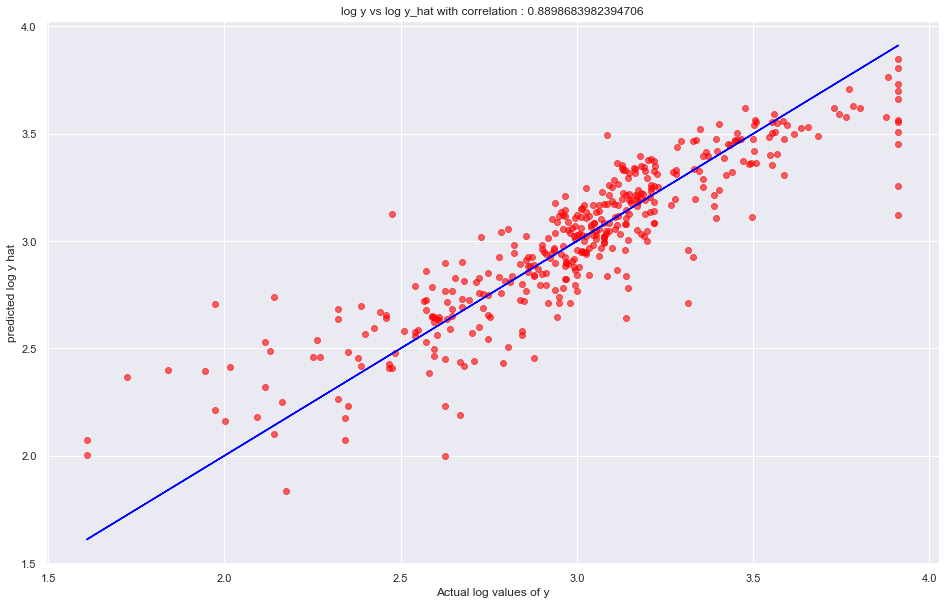

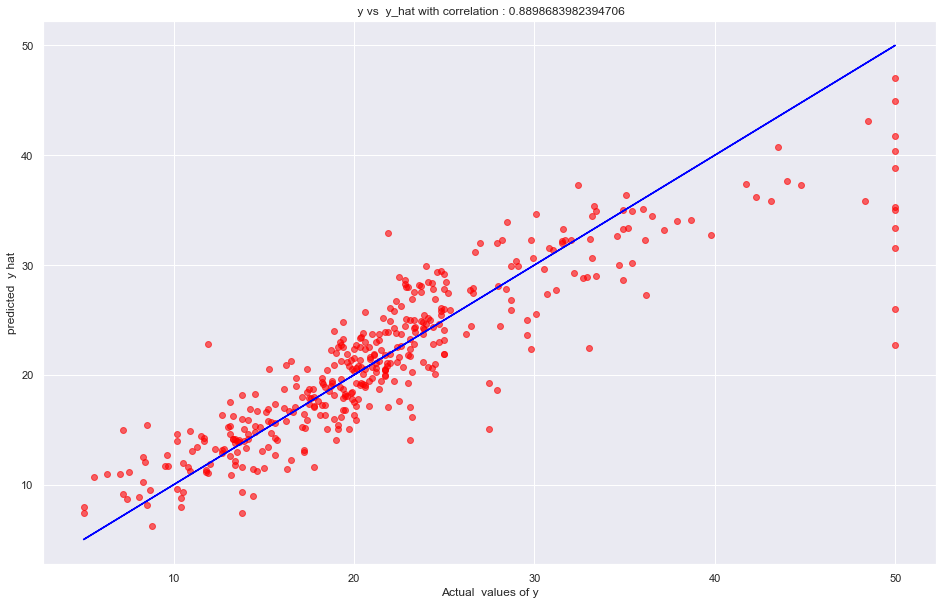

In [72]:
# Model with log prices and excluding features : INDUS,AGE

prices = np.log(data['PRICE'])
features = data.drop(['PRICE','INDUS','AGE'],axis=1)

X_train,X_test, y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

#use statsModel to fit data

x_value_const = sm.add_constant(X_train)
model = sm.OLS(y_train,x_value_const)
results = model.fit()

# get predicted y values for model : results.fittedvalues , type:series
# type of y_train : series

#get residual manually
#resi = y_train - results.fittedvalues
residuals = results.resid
y_hat = results.fittedvalues

# graph of actual vs. predicted

#find correllation between y and y_hat
corr_y = y_train.corr(y_hat)

plt.figure(figsize=(16,10))
plt.scatter(x=y_train,y=y_hat,c='red',alpha=0.6)
plt.xlabel('Actual log values of y')
plt.ylabel('predicted log y hat')
plt.title(f'log y vs log y_hat with correlation : {corr_y}')


plt.plot(y_train,y_train,c='blue')
plt.show()

plt.figure(figsize=(16,10))
plt.scatter(x=np.e**y_train,y=np.e**y_hat,c='red',alpha=0.6)
plt.xlabel('Actual  values of y')
plt.ylabel('predicted  y hat')
plt.title(f' y vs  y_hat with correlation : {corr_y}')

plt.plot(np.e**y_train,np.e**y_train,c='blue')
plt.show()


### plot residuals

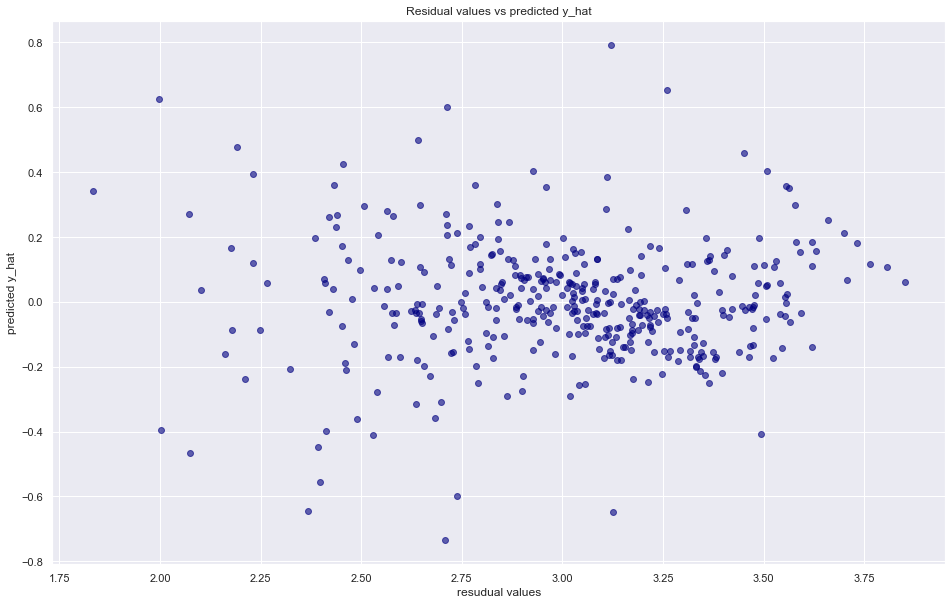

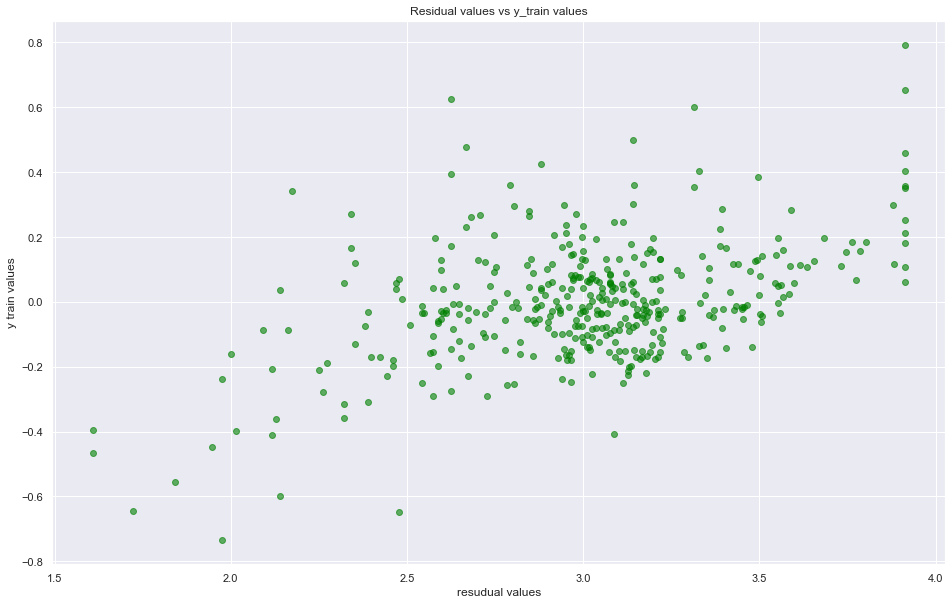

In [73]:
plt.figure(figsize=(16,10))
plt.scatter(y=residuals,x=y_hat,c='navy',alpha=0.6)
plt.xlabel('resudual values')
plt.ylabel('predicted y_hat')
plt.title('Residual values vs predicted y_hat')
plt.show()

plt.figure(figsize=(16,10))
plt.scatter(y=residuals,x=y_train,c='green',alpha=0.6)
plt.xlabel('resudual values')
plt.ylabel('y train values')
plt.title('Residual values vs y_train values')
plt.show()

residual values are close to zero :)

In [74]:
#check normality of residuals. if normality holds: mean = 0 and skew = 0
residual_mean = residuals.mean()
residual_skew = residuals.skew()
print(round(residual_mean,4) , residual_skew)

-0.0 0.11775876201184944


D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


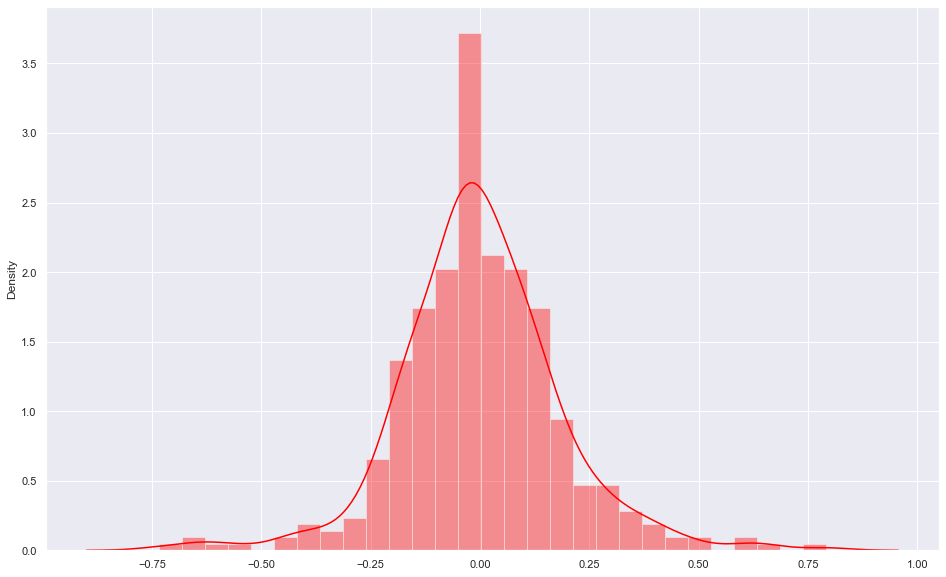

0.035 0.792


In [75]:
#plot residual values
sns.set()
plt.figure(figsize=(16,10))
sns.distplot(residuals,color='red')
plt.show()


# Mean Square error and R_squared
log_reduced_mse = round(results.mse_resid,3)
log_reduced_rsquared = round(results.rsquared,3)
print(log_reduced_mse,log_reduced_rsquared)

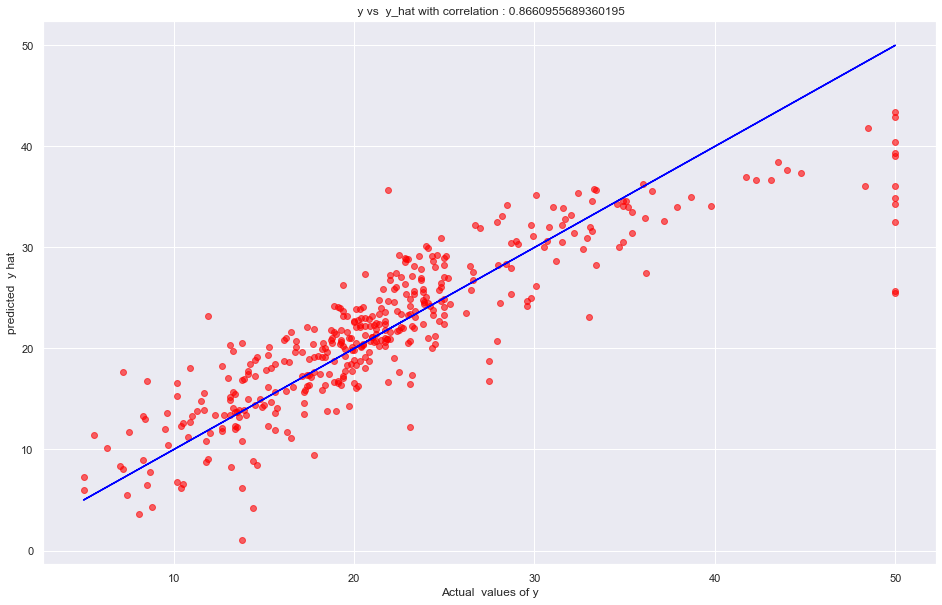

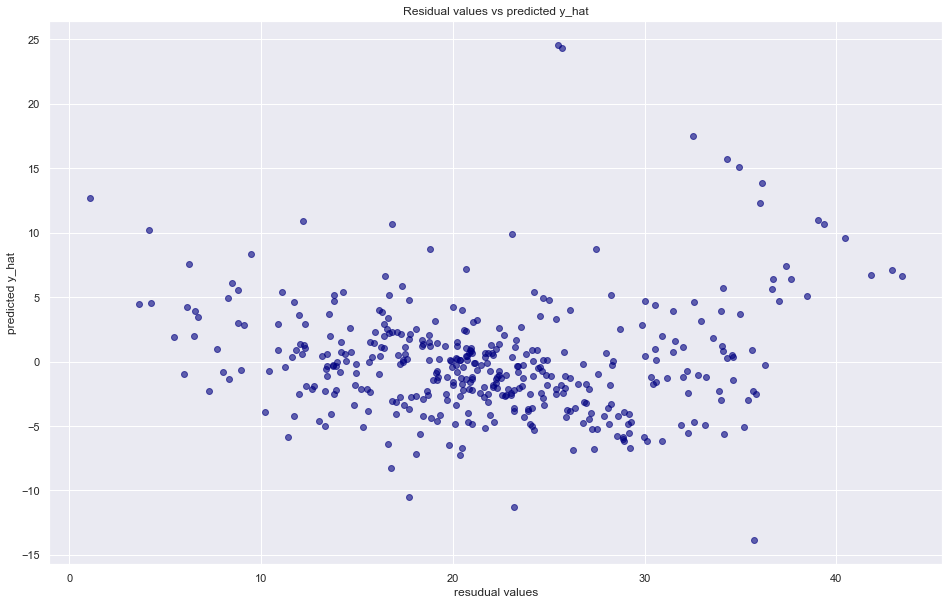

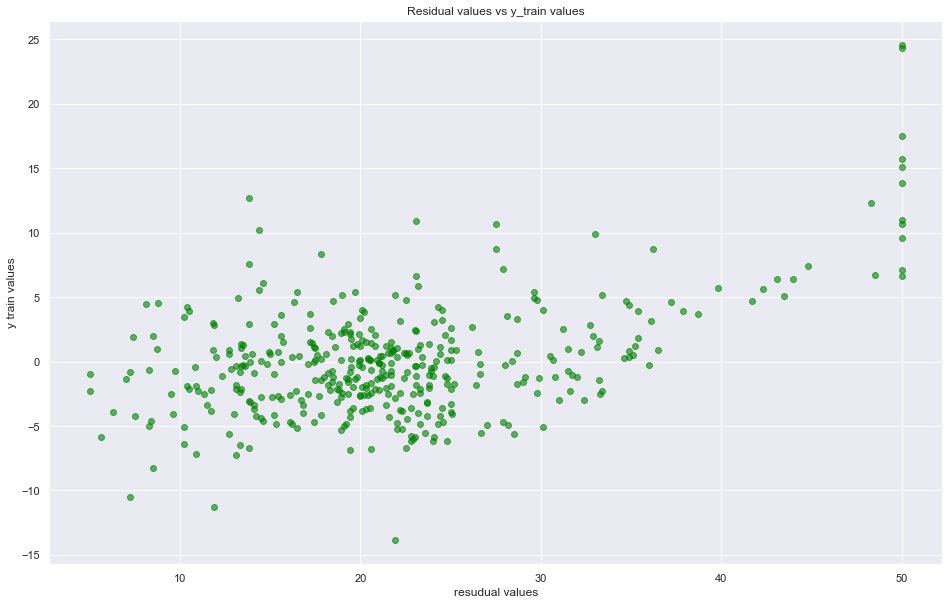

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


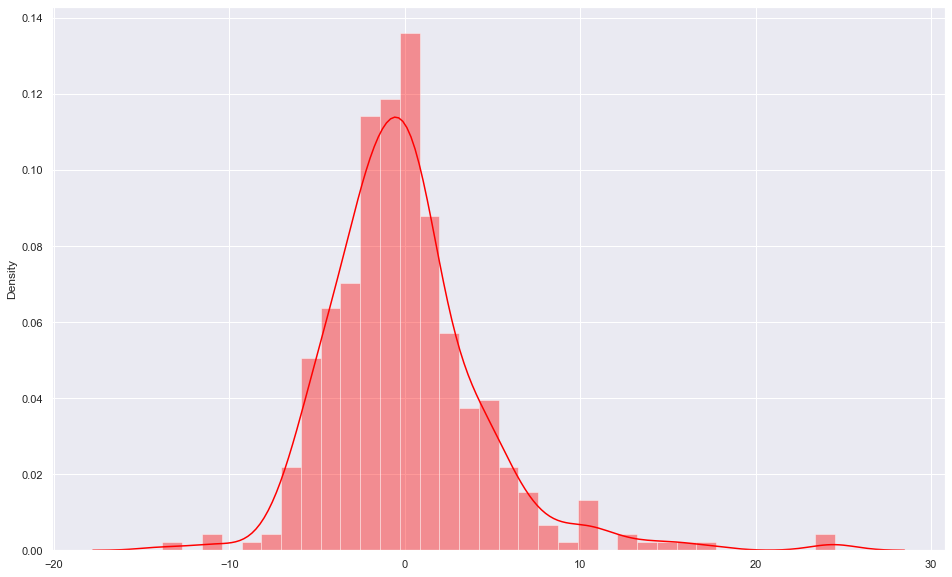

0.0 1.4594428196679858
19.921 0.75


In [76]:
# Model with prices and all features

prices = data['PRICE']
features = data.drop('PRICE',axis=1)

X_train,X_test, y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

#use statsModel to fit data

x_value_const = sm.add_constant(X_train)
model = sm.OLS(y_train,x_value_const)
results = model.fit()

# get predicted y values for model : results.fittedvalues , type:series
# type of y_train : series

#get residual manually
#resi = y_train - results.fittedvalues
residuals = results.resid
y_hat = results.fittedvalues

# graph of actual vs. predicted

#find correllation between y and y_hat
corr_y = y_train.corr(y_hat)

plt.figure(figsize=(16,10))
plt.scatter(x=y_train,y=y_hat,c='red',alpha=0.6)
plt.xlabel('Actual  values of y')
plt.ylabel('predicted  y hat')
plt.title(f' y vs  y_hat with correlation : {corr_y}')

plt.plot(y_train,y_train,c='blue')
plt.show()

#plot residuals
plt.figure(figsize=(16,10))
plt.scatter(y=residuals,x=y_hat,c='navy',alpha=0.6)
plt.xlabel('resudual values')
plt.ylabel('predicted y_hat')
plt.title('Residual values vs predicted y_hat')
plt.show()

plt.figure(figsize=(16,10))
plt.scatter(y=residuals,x=y_train,c='green',alpha=0.6)
plt.xlabel('resudual values')
plt.ylabel('y train values')
plt.title('Residual values vs y_train values')
plt.show()

#plot residual values
sns.set()
plt.figure(figsize=(16,10))
sns.distplot(residuals,color='red')
plt.show()

#check normality of residuals. if normality holds: mean = 0 and skew = 0
residual_mean = residuals.mean()
residual_skew = residuals.skew()
print(round(residual_mean,4) , residual_skew)

# Mean Square error and R_squared
full_normal_mse = round(results.mse_resid,3)
full_normal_rsquared = round(results.rsquared,3)
print(full_normal_mse,full_normal_rsquared)

In [77]:
print(log_reduced_mse,log_reduced_rsquared)
print(full_normal_mse,full_normal_rsquared)

0.035 0.792
19.921 0.75


In [78]:
log_reduce_rmse = np.sqrt(log_reduced_mse)
full_normal_rmse = np.sqrt(full_normal_mse)

#if our predicted values = 30000$
actual_log_value_upper_bound = np.log(30000) + 2*log_reduce_rmse
actual_log_value_lower_bound = np.log(30000) - 2*log_reduce_rmse

actual_value_upper = np.e**(actual_log_value_upper_bound)
actual_value_lower = np.e**(actual_log_value_lower_bound)

print(actual_value_lower,actual_value_upper)

20635.88690682414 43613.342332399385
